In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Min Max

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)

In [ ]:
normalized_data

In [ ]:
# Create a new DataFrame using the normalized data and original column names
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

In [ ]:
normalized_df.head()

In [ ]:
normalized_df.to_csv('normalized_df.csv')

## Correlation Matrix

In [9]:
# load the dataset
df1 = pd.read_csv('normalized_df.csv')
df1.head(3)

,Unnamed: 0,Wind_Direction,Wind_Speed_(km/h),temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),surface_pressure (hPa),et0_fao_evapotranspiration (mm),vapor_pressure_deficit (kPa),soil_temperature_28_to_100cm (°C),soil_moisture_28_to_100cm (m³/m³),direct_radiation (W/m²),diffuse_radiation (W/m²),rain (mm),weathercode (wmo code),windgusts_10m (km/h),cloudcover (%),Production (mt),Area (ha),Yield (mt/ha)
0,0,0.461538,0.136929,0.713056,0.255975,0.573394,0.667076,0.619048,0.696970,0.616583,0.322581,0.463787,0.424911,0.195503,0.0,0.161111,1.0,0.015581,0.012642,0.369309
1,1,0.615385,0.095436,0.702726,0.232704,0.556193,0.669438,0.619048,0.712121,0.602470,0.290323,0.447879,0.598331,0.182520,0.0,0.277778,1.0,0.015928,0.012914,0.370068
2,2,0.615385,0.095436,0.740603,0.000000,0.485092,0.672744,0.809524,0.954545,0.721258,0.096774,0.523280,0.582241,0.143454,0.0,0.077778,1.0,0.015052,0.012574,0.358525


In [10]:
df1 = df1.drop(columns=['Unnamed: 0', 'Production (mt)', 'Area (ha)'])

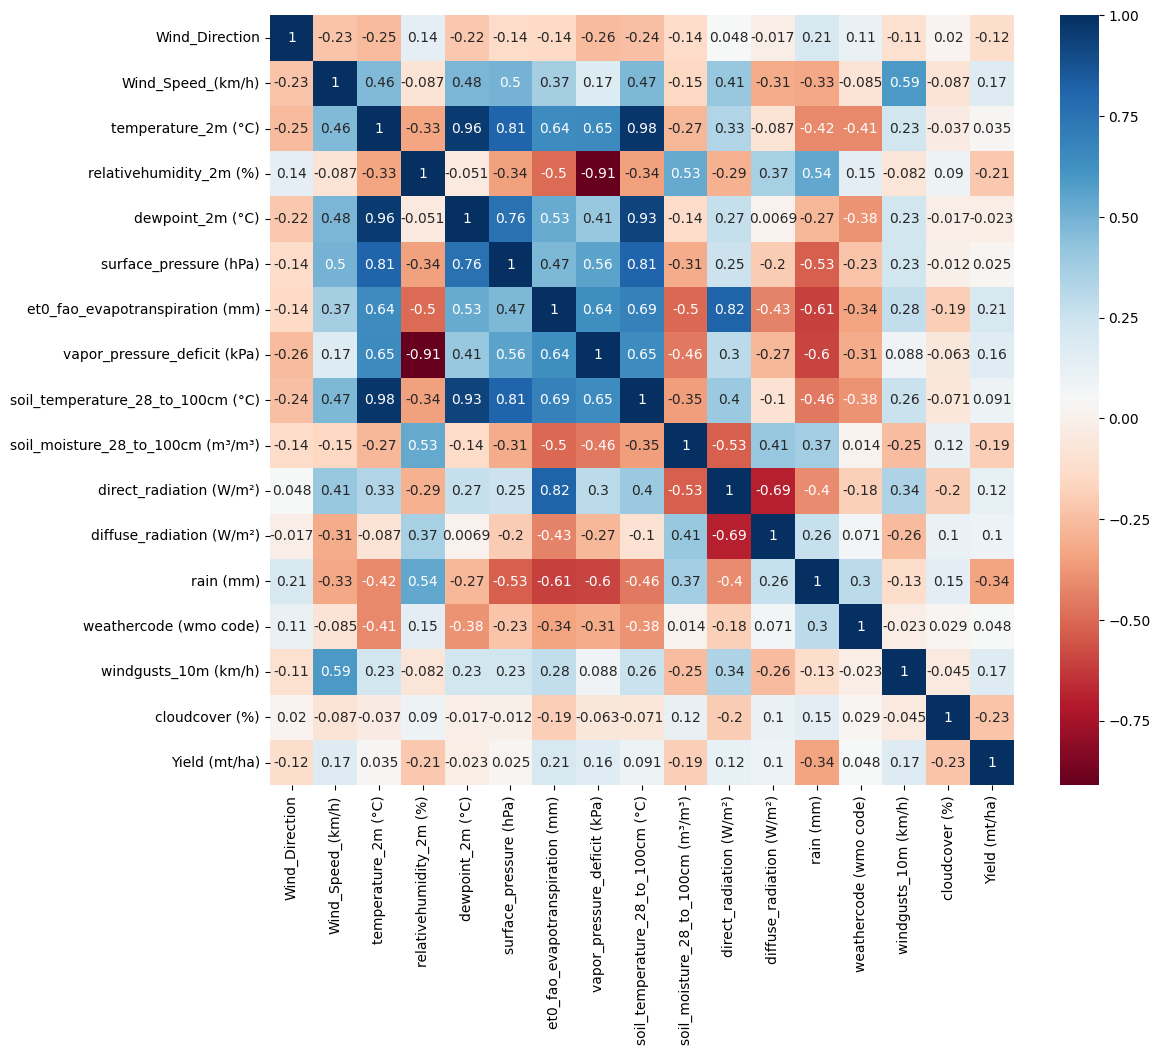

In [11]:
#Using Pearson Correlation

plt.figure(figsize=(12,10))
cor = df1.corr()
sns.heatmap(cor, annot=True, cmap='RdBu')
plt.show()

## VIF

In [12]:
# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = df1.drop('Yield (mt/ha)', axis=1)
y = df1['Yield (mt/ha)']

In [13]:
# Calculate VIF using the features in x
def cal_vif(x):
    thresh = 5
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    for i in range(1,k):
        print('Iteration no ', i)
        print(vif)
        a = np.argmax(vif)
        print('Vif value : ', a)
        if(vif[a]<=thresh):
            break
        if(i==1):
            output = x.drop(x.columns[a],axis=1)
            vif = [variance_inflation_factor(output.values,j) for j in range(output.shape[1])]
        elif(i>1):
            output = output.drop(output.columns[a],axis=1)
            vif = [variance_inflation_factor(output.values,j) for j in range(output.shape[1])]
    return(output)
    
selected_features = cal_vif(x)
selected_features.head()

Iteration no  1
[5.015258555754017, 7.279582663780733, 69960.48750643268, 948.8484330507806, 59053.53645518068, 41.093502520826654, 80.17982771297028, 1695.1159395580303, 355.4163491209874, 29.607030888865847, 80.70476693792224, 29.13707343644291, 14.852185812986963, 1.6780950952141875, 5.3216495736637945, 207.26462016649333]
Vif value :  2
Iteration no  2
[5.010418122677259, 7.217006800156813, 206.5060652384126, 348.4499232472824, 40.46829581450419, 79.51008648013347, 76.8721112066877, 341.73966619577743, 29.604045768085687, 75.30174606266488, 27.367758070787946, 14.312198778076702, 1.6775713069168683, 5.306806546579371, 202.68388780898155]
Vif value :  3
Iteration no  3
[5.006091939653032, 6.9268703168051, 182.87410081359636, 39.61230910699519, 78.08501219611139, 76.69562670439619, 99.62393591436769, 28.867462237544583, 70.06800824986861, 26.098202127101718, 13.183927762216832, 1.577277257539569, 5.2624115751027425, 199.1875400829909]
Vif value :  13
Iteration no  4
[4.99481681149797

,Wind_Direction,Wind_Speed_(km/h),vapor_pressure_deficit (kPa),rain (mm),weathercode (wmo code),windgusts_10m (km/h)
0,0.461538,0.136929,0.696970,0.195503,0.0,0.161111
1,0.615385,0.095436,0.712121,0.182520,0.0,0.277778
2,0.615385,0.095436,0.954545,0.143454,0.0,0.077778
3,0.615385,0.116183,0.621212,0.257075,0.0,0.100000
4,0.461538,0.116183,0.621212,0.199584,0.0,0.116667


In [24]:
# Creating a new DataFrame with the selected subset of columns
vif = df1.loc[:, ['Wind_Direction', 'Wind_Speed_(km/h)', 'vapor_pressure_deficit (kPa)', 'weathercode (wmo code)', 'windgusts_10m (km/h)', 'Yield (mt/ha)']]
vif

,Wind_Direction,Wind_Speed_(km/h),vapor_pressure_deficit (kPa),weathercode (wmo code),windgusts_10m (km/h),Yield (mt/ha)
0,0.461538,0.136929,0.696970,0.0,0.161111,0.369309
1,0.615385,0.095436,0.712121,0.0,0.277778,0.370068
2,0.615385,0.095436,0.954545,0.0,0.077778,0.358525
3,0.615385,0.116183,0.621212,0.0,0.100000,0.371581
4,0.461538,0.116183,0.621212,0.0,0.116667,0.373047
...,...,...,...,...,...,...
744,0.538462,0.132780,0.242424,0.0,0.061111,0.272636
745,0.538462,0.132780,0.287879,0.0,0.100000,0.274456
746,0.538462,0.132780,0.424242,0.0,0.061111,0.273521
747,0.538462,0.070539,0.393939,0.0,0.077778,0.284852


In [25]:
vif.to_csv('VIF(minmaxTreated).csv')

## Random Forest

In [17]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [19]:
# Split dataset into training and testing sets
X = df1.drop('Yield (mt/ha)', axis=1)
y = df1['Yield (mt/ha)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [20]:
# Initialize a RFR with 100 decision trees
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [21]:
# Measure how much a feature contributes to the model
rf.feature_importances_

array([2.69842091e-02, 4.66876930e-02, 4.91519487e-02, 5.65305512e-02,
       7.14565809e-02, 1.98084736e-01, 6.99729488e-03, 3.00575887e-02,
       3.45663599e-02, 3.53913230e-02, 4.64174212e-02, 5.67097626e-02,
       2.69800064e-01, 1.20226780e-02, 5.91171706e-02, 2.46183751e-05])

Text(0.5, 0, 'Random Forest Feature Importance')

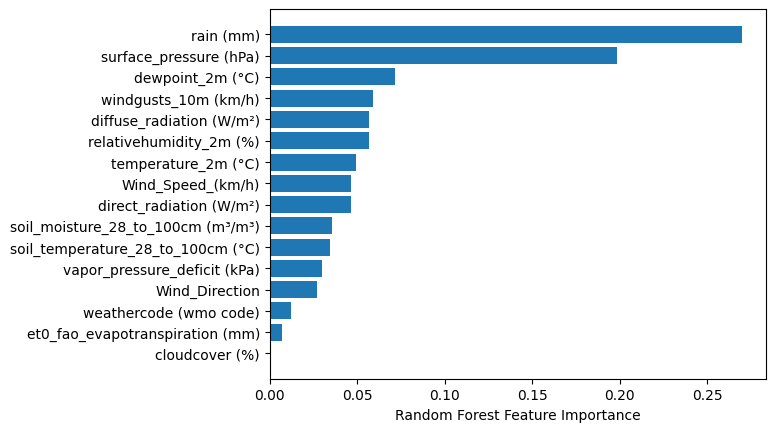

In [22]:
# Visualize the feature importances
sorted_idx = rf.feature_importances_.argsort()
plt.barh(df1.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [23]:
df1.columns

Index(['Wind_Direction', 'Wind_Speed_(km/h)', 'temperature_2m (°C)',
       'relativehumidity_2m (%)', 'dewpoint_2m (°C)', 'surface_pressure (hPa)',
       'et0_fao_evapotranspiration (mm)', 'vapor_pressure_deficit (kPa)',
       'soil_temperature_28_to_100cm (°C)',
       'soil_moisture_28_to_100cm (m³/m³)', 'direct_radiation (W/m²)',
       'diffuse_radiation (W/m²)', 'rain (mm)', 'weathercode (wmo code)',
       'windgusts_10m (km/h)', 'cloudcover (%)', 'Yield (mt/ha)'],
      dtype='object')

In [26]:
# Create new DataFrame to be used for modeling
randomForest = df1.loc[:, ['rain (mm)', 'surface_pressure (hPa)', 'dewpoint_2m (°C)', 'windgusts_10m (km/h)', 'diffuse_radiation (W/m²)','Yield (mt/ha)']]
randomForest

,rain (mm),surface_pressure (hPa),dewpoint_2m (°C),windgusts_10m (km/h),diffuse_radiation (W/m²),Yield (mt/ha)
0,0.195503,0.667076,0.573394,0.161111,0.424911,0.369309
1,0.182520,0.669438,0.556193,0.277778,0.598331,0.370068
2,0.143454,0.672744,0.485092,0.077778,0.582241,0.358525
3,0.257075,0.670477,0.580275,0.100000,0.492253,0.371581
4,0.199584,0.667265,0.582569,0.116667,0.445769,0.373047
...,...,...,...,...,...,...
744,0.580755,0.780255,0.844037,0.061111,0.892729,0.272636
745,0.382998,0.780444,0.845183,0.100000,0.646007,0.274456
746,0.302826,0.788380,0.811927,0.061111,0.597139,0.273521
747,0.451411,0.784317,0.839450,0.077778,0.619190,0.284852


In [28]:
randomForest.to_csv('RandomForest(minmaxTreated).csv')

## Sequential Feature Selection

In [29]:
# Importing libraries for Sequential Feature Selction
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.naive_bayes import GaussianNB

In [35]:
# Splitting dataset into training and testing sets
X = df1.drop('Yield (mt/ha)', axis=1).astype(int)
y = df1['Yield (mt/ha)'].astype(int)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [36]:
# Selecting top four features 
selector = SequentialFeatureSelector(GaussianNB() ,n_features_to_select=4, direction='forward', scoring="roc_auc", cv=5)

selector.fit_transform(X_train,y_train)

C:\Users\Angel\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Angel\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Angel\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\Angel\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_scorer.py", line 471, in _score
    return self._sign * self._score_func(y, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Angel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\_param_va

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       ...,
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [37]:
selector

SequentialFeatureSelector(estimator=GaussianNB(), n_features_to_select=4,
                          scoring='roc_auc')

In [38]:
# Extracting the names of the selected features
feature_names = np.array(df1.drop('Yield (mt/ha)',axis=1).columns.tolist())
feature_names[selector.get_support()]

array(['Wind_Direction', 'Wind_Speed_(km/h)', 'temperature_2m (°C)',
       'relativehumidity_2m (%)'], dtype='<U33')

In [39]:
# Create new DataFrame to be used for modeling
SFF = df1.loc[:, ['Wind_Direction', 'Wind_Speed_(km/h)', 'temperature_2m (°C)', 'relativehumidity_2m (%)','Yield (mt/ha)']]
SFF

,Wind_Direction,Wind_Speed_(km/h),temperature_2m (°C),relativehumidity_2m (%),Yield (mt/ha)
0,0.461538,0.136929,0.713056,0.255975,0.369309
1,0.615385,0.095436,0.702726,0.232704,0.370068
2,0.615385,0.095436,0.740603,0.000000,0.358525
3,0.615385,0.116183,0.686657,0.333962,0.371581
4,0.461538,0.116183,0.691248,0.324528,0.373047
...,...,...,...,...,...
744,0.538462,0.132780,0.770445,0.801887,0.272636
745,0.538462,0.132780,0.787661,0.757233,0.274456
746,0.538462,0.132780,0.808321,0.628302,0.273521
747,0.538462,0.070539,0.820947,0.666667,0.284852


In [40]:
SFF.to_csv('SFF(minmaxTreated).csv')